In [17]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#more detailed
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans




spotify = pd.read_csv('playlist_dataset.csv', header=0)
spotify

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [18]:
#spotify.info()
missing_data_col = spotify.isnull().apply(func=sum) #verif colonnes

missing_data_row=spotify[spotify.isnull().any(axis=1)]

missing_data_row
data_spotify=spotify.dropna()
data_spotify[data_spotify.isnull().any(axis=1)]

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [19]:
#print(data_spotify.columns)
data_spotify.nunique()

playlist_url           23
year                   23
track_id             2201
track_name           2120
track_popularity       71
album                1663
artist_id             891
artist_name           891
artist_genres         698
artist_popularity      62
danceability          585
energy                641
key                    12
loudness             1897
mode                    2
speechiness           860
acousticness         1322
instrumentalness      841
liveness              807
valence               827
tempo                2074
duration_ms          2033
time_signature          4
dtype: int64

<Axes: >

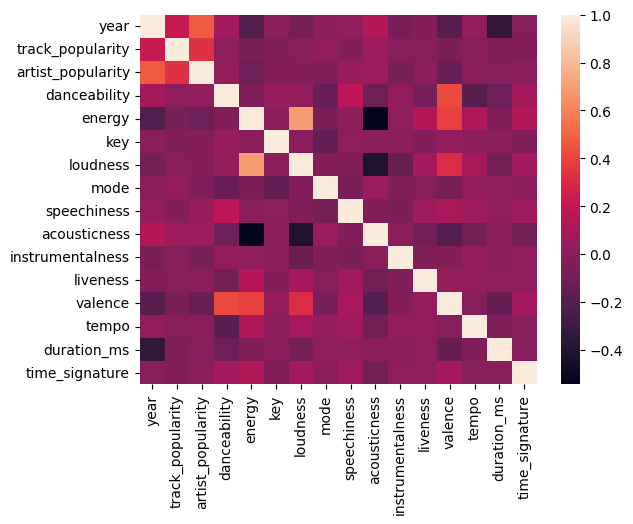

In [20]:
num_spotify=data_spotify.select_dtypes(include=[int,float])
corr=num_spotify.corr()
sns.heatmap(corr)

## PCA

In [49]:
#centrer et reduire dataset de valeurs numériques

spotify_centered=num_spotify.sub(num_spotify.mean())
spotify_reducted=spotify_centered.div(spotify_centered.std())

pca=PCA() #crée le model pca
pca.fit(spotify_reducted) #recherche des axes de projections
spotify_pca=pca.fit_transform(spotify_centered) #projette les donnes sur les axes

print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

print(spotify_centered.std())


[9.99999368e-01 4.30633258e-07 1.17252500e-07 5.81641214e-08
 1.56702665e-08 7.42328604e-09 2.37573100e-09 1.32564108e-10
 3.06149278e-11 2.50967247e-11 1.94448967e-11 1.04350231e-11
 8.16578839e-12 4.83436878e-12 4.49838735e-12 3.48994981e-12]
[0.99999937 0.9999998  0.99999992 0.99999997 0.99999999 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
year                     6.634528
track_popularity        12.294047
artist_popularity       12.180506
danceability             0.141137
energy                   0.164838
key                      3.628494
loudness                 2.080853
mode                     0.490304
speechiness              0.092445
acousticness             0.203844
instrumentalness         0.083990
liveness                 0.131620
valence                  0.227821
tempo                   27.617729
duration_ms          42063.678588
time_signature           0.219054
dtype: float64


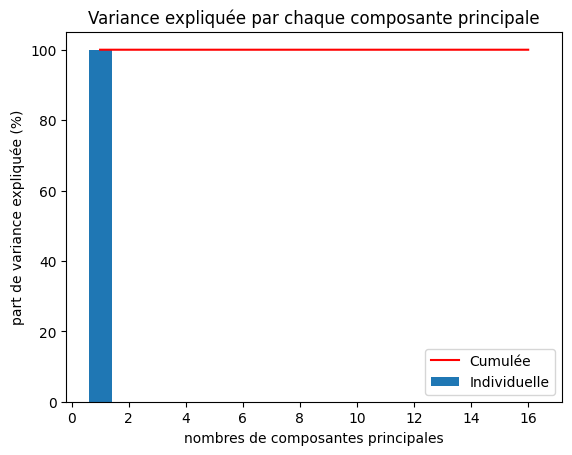

In [47]:
#affichage 
plt.figure()



# Bar chart : variance expliquée par chaque composante
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_*100, label='Individuelle')

# Courbe cumulée
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_)*100,color='red', label='Cumulée')


plt.xlabel('nombres de composantes principales')
plt.ylabel('part de variance expliquée (%)')
plt.title("Variance expliquée par chaque composante principale")
plt.legend()
plt.show()

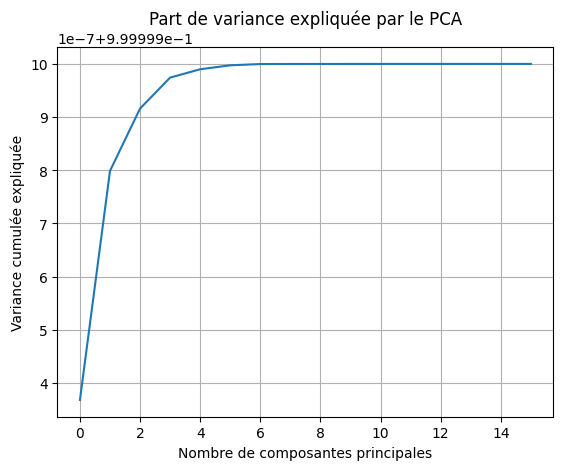

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance cumulée expliquée")
plt.title("Part de variance expliquée par le PCA")
plt.grid()
plt.show()


In [22]:
#affichage du cercle des corrélations 

biplot(pca,x=,cat=y,components=[0,1])

plt.show()

SyntaxError: invalid syntax (1354084393.py, line 3)